In [ ]:
# Author: Nelle Varoquaux <nelle.varoquaux@gmail.com>
# License: BSD

print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show()
nmds.stress_

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data= pd.read_excel('OutputScriptMarie_KovatsMatchOnly70.xlsx.xlsx', sheetname ='to use for NDMS')

#SUBSET DATA BY SPECIES FOR PLOT MEAN ABUNDANCE CHEMICAL
data_Obt = data.iloc[0:39, :]
data_Dil = data.iloc[53:70, :]
data_Stri = data.iloc[88:105, :]
data_Cil = data.iloc[105:111, :] 
data_Hur = data.iloc[78:88, :]


In [7]:
#RANDOM SUBSET OBT, DIL and STRI SO N~10 per species
#subset_Obt = np.random.choice(range(0, data_Obt.shape[0]), 10)
#subset_Dil = np.random.choice(range(0, data_Dil.shape[0]), 10)
#subset_Stri = np.random.choice(range(0, data_Stri.shape[0]), 10)

#data_Obt = data_Obt.iloc[subset_Obt, :]
#data_Stri = data_Stri.iloc[subset_Stri, :]
#data_Dil = data_Dil.iloc[subset_Dil, :]

dataAll = np.vstack((data_Obt, data_Dil, data_Stri, data_Cil, data_Hur))

In [8]:
print ('The sample size of each group is', data_Obt.shape,  data_Dil.shape,  data_Stri.shape,  data_Cil.shape,  data_Hur.shape)

The sample size of each group is (39, 56) (17, 56) (17, 56) (6, 56) (10, 56)


In [9]:
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
dataAll.shape

(89, 56)

In [11]:
similarities = euclidean_distances(dataAll[:, 2:])


stress= np.zeros(5)
for i in range(5):
    mds = manifold.MDS(n_components=i+1, max_iter=3000, eps=1e-9, 
                   dissimilarity="precomputed", n_jobs=1)
    pos = mds.fit(similarities).embedding_
    nmds = manifold.MDS(n_components=i+1, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", n_jobs=1)
    npos = nmds.fit_transform(similarities, init=pos)
    stress[i] = nmds.stress_
    
#stress[4] = nmds.stress_

/Users/ryokubo/anaconda/lib/python3.5/site-packages/sklearn/manifold/mds.py:238: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  % n_init)


array([  1.18636780e+01,   7.01560289e-04,   6.07346378e-04,
         3.91445653e-04,   5.44765502e-05])

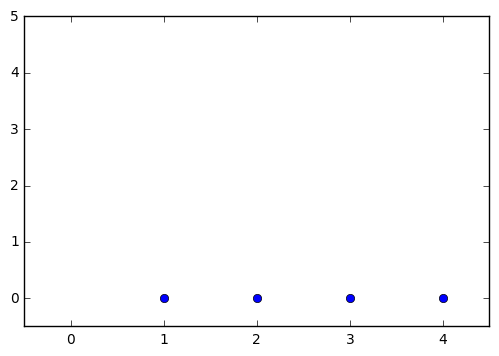

In [12]:
stress
plt.plot(range(5), stress, 'o')
plt.ylim(-0.5, 5)
plt.xlim(-0.5, 4.5)
#plt.xaxis([1, 2, 3, 4, 5])
stress

In [13]:
similarities = euclidean_distances(dataAll[:, 2:])


mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_
nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", n_jobs=1)
npos = nmds.fit_transform(similarities, init=pos)
   
#stress[4] = nmds.stress_

/Users/ryokubo/anaconda/lib/python3.5/site-packages/sklearn/manifold/mds.py:238: UserWarning: Explicit initial positions passed: performing only one init of the MDS instead of 4
  % n_init)


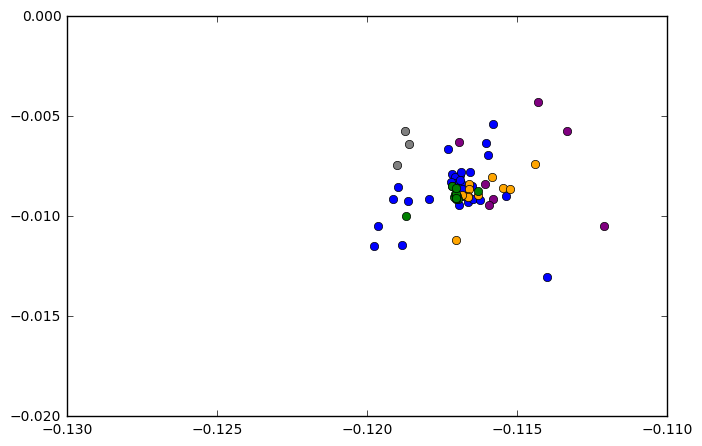

In [82]:
# Rescale the data
#pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
#npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA()
X_true = clf.fit_transform(dataAll[:, 2:])

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 10
Cil = np.repeat(3, data_Cil.shape[0])
Dil = np.repeat(1, data_Dil.shape[0])
Str = np.repeat(2, data_Stri.shape[0])
Obt = np.repeat(0, data_Obt.shape[0])
Hur = np.repeat(4, data_Hur.shape[0])

Species = np.concatenate((Obt, Dil, Str, Cil, Hur))

#plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            #label='True Position')
#plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
#plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
#plt.legend(scatterpoints=1, loc='best', shadow=False)
col = ['blue',  'orange','green', 'gray', 'purple']
#i=0
#for types in set(Species):
   # plt.scatter(npos[Species==types, 0],
  #          npos[Species==types, 1],s=s, lw= 0, c=col[i])
 #   i+=1
#
#plt.legend(set(Species), loc='best', shadow='TRUE')


i=0
for types in set(Species):
    plt.plot(npos[Species==types, 0],
            npos[Species==types, 1], 'o', c=col[i])
    plt.xlim(-0.13, -0.11)
    plt.ylim(-0.02,0)
    i+=1

#plt.legend(set(Species), loc='best', shadow='TRUE')
#npos